# <font color='#2F4F4F'>AfterWork Data Science: Recurrent Neural Networks with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understanding </font>

### a) Specifying the Research Question

Build a recurrent neural networks model that will be used to predict Tesla stock prices in 2017 using data from 2012-2016

### b) Defining the Metric for Success

Build a neural networks regression model with an RSME  less than 10% of the target mean.

### c) Understanding the Context 

Stockpy is an innovative fintech enabling financial prosperity for the entire population. It is a venture funded startup based in Palo Alto bringing world-class financial experiences to a continually growing customer base. As Stockpy enters an expansion phase for innovative fintech product offerings, it aims to enhance the enormous value in data processing and analysis for continuous growth and success.

As a Finance Data Scientist for Stockpy, you provide leadership to turn cutting-edge technology into actionable insights; unlocking the power of data that provides value to business decisions and customer service enhancements.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings and Recommendation
* Challenging the Solution


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [51]:
# Importing standard libraries
# ---
# 
# YOUR CODE GOES HERE
import pandas as pd               # library for data manipulation
import numpy as np                # library for scientific computations
import matplotlib.pyplot as plt   # library for data visualisation 


In [52]:
# Importing our dataset
# ---
#
train_df = pd.read_csv('https://bit.ly/38dSbSb')
#train_df.head()

## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [53]:
# Sample train dataset
# ---
#
train_df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
769,2015-01-26,40.366001,41.723999,40.209999,41.310001,41.310001,16172500
58,2012-03-27,7.432000,7.990000,7.406000,7.588000,7.588000,12696000
1097,2016-05-13,41.556000,42.240002,41.340000,41.521999,41.521999,14114000
1052,2016-03-10,42.000000,42.658001,40.133999,41.035999,41.035999,25962500
1064,2016-03-29,45.978001,46.476002,45.066002,46.026001,46.026001,20071500
316,2013-04-09,8.360000,8.366000,8.066000,8.100000,8.100000,8480500
462,2013-11-04,33.000000,35.077999,32.844002,35.040001,35.040001,65602000
1129,2016-06-29,41.026001,42.355999,40.599998,42.037998,42.037998,29974500
322,2013-04-17,9.100000,9.190000,8.908000,9.090000,9.090000,10592500
1078,2016-04-18,50.445999,51.661999,50.332001,50.776001,50.776001,21357000


In [54]:
# Statistical summary
# ---
train_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,31.997898,32.558671,31.403696,31.989245,31.989245,2.551310e+07
std,16.911515,17.148543,16.649245,16.903500,16.903500,2.259037e+07
min,5.324000,5.370000,4.528000,4.558000,4.558000,1.824500e+06
25%,8.403000,8.556000,8.197000,8.379500,8.379500,1.059400e+07
50%,39.411000,40.123998,38.709000,39.427000,39.427000,2.007650e+07
75%,45.214499,45.934999,44.303000,45.076502,45.076502,3.245150e+07
max,57.534000,58.284000,56.080002,57.208000,57.208000,1.858195e+08


## <font color='#2F4F4F'>Step 4. Data Preparation</font>

In [55]:
# Getting our train dataset
# ---
#
#YOUR CODE GOES HERE
train_set = train_df.iloc[:, 1:2].values
print(train_set)

[[ 5.788   ]
 [ 5.642   ]
 [ 5.552   ]
 ...
 [44.306   ]
 [43.712002]
 [43.259998]]


In [56]:
# Performing Feature scaling
# ---
#
#YOUR CODE GOES HERE
from sklearn.preprocessing import MinMaxScaler
sc =  MinMaxScaler(feature_range = (0, 1))

train_set_scaled = sc.fit_transform(train_set)
print(train_set_scaled)

[[0.00888719]
 [0.00609079]
 [0.00436698]
 ...
 [0.74663857]
 [0.73526148]
 [0.72660406]]


In [57]:
# Creating a dataset with 60 timesteps and 1 output
# ---
#
#YOUR CODE GOES HERE
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [58]:
# Reshaping 
# ---
#
#YOUR CODE GOES HERE
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

In [59]:
# Building the RNN
# ---
#
#YOUR CODE GOES HERE
# Importing the Keras libraries and packages
# ---
#
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


In [60]:
# Initialising the RNN
# ---
#
#YOUR CODE GOES HERE
regressor = Sequential()

# Adding the 4 LSTM layers and some Dropout regularisation
# ---
# 
# Adding a second LSTM layer and some Dropout regularisatio
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
# ---
#
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# ---
# 'return_sequences' is False as we will not add more LSTM layers after this one.
# ---
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(0.2))

# Adding the output layer
# ---
# 'output dimension' is 1 since we are predicting 1 price each time.
# ---
regressor.add(Dense(units = 1))

In [61]:
# Compile the RNN 
# ---
#
#YOUR CODE GOES HERE
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [62]:
# Fitting the RNN to the training set
# ---
#
#YOUR CODE GOES HERE
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 10s 68ms/step - loss: 0.0320
Epoch 2/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0090
Epoch 3/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0075
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0073
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0067
Epoch 6/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0060
Epoch 7/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0074
Epoch 8/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0055
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0060
Epoch 10/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0056
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0055
Epoch 12/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0053
Epoch 13/100
38/38 [====

In [63]:
test_df = pd.read_csv('https://bit.ly/3kW8E0K')
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
1,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
2,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
3,2020-01-09,99.419998,99.760002,94.573997,96.267998,96.267998,142202000
4,2020-01-10,96.358002,96.987999,94.739998,95.629997,95.629997,64797500


In [64]:
# Making predictions: Getting the predicted stock price for 2017
# ---
#
#YOUR CODE GOES HERE

# Getting Test Dataset feature values
# ---
# NB: We are using the 'Open' feature
# ---
#
real_stock_price = test_df.iloc[:, 1:2].values
print(real_stock_price)

[[ 88.094002]
 [ 92.279999]
 [ 94.739998]
 [ 99.419998]
 [ 96.358002]
 [ 98.699997]
 [108.851997]
 [105.952003]
 [ 98.75    ]
 [101.522003]
 [106.050003]
 [114.377998]
 [112.849998]
 [114.125999]
 [108.398003]
 [113.697998]
 [115.138   ]
 [126.484001]
 [128.      ]
 [134.738007]
 [176.591995]
 [164.651993]
 [139.983994]
 [146.110001]
 [160.      ]
 [153.757996]
 [155.574005]
 [148.367996]
 [157.444   ]
 [168.320007]
 [184.699997]
 [182.389999]
 [181.395996]
 [167.800003]
 [169.800003]
 [156.5     ]
 [146.      ]
 [125.940002]
 [142.251999]
 [161.      ]
 [152.792007]
 [144.753998]
 [138.      ]
 [121.078003]
 [131.886002]
 [128.039993]
 [116.178001]
 [119.      ]
 [ 93.900002]
 [ 88.001999]
 [ 77.800003]
 [ 74.940002]
 [ 87.639999]
 [ 86.720001]
 [ 95.459999]
 [109.050003]
 [109.477997]
 [101.      ]
 [102.052002]
 [100.25    ]
 [100.800003]
 [ 96.206001]
 [101.900002]
 [102.239998]
 [109.      ]
 [110.839996]
 [112.417999]
 [118.031998]
 [139.794006]
 [148.399994]
 [143.388   ]
 [154.

In [70]:
# Concatenating the train and test datasets for prediction.
# Since we use the previous 60 days' stock prices to predict the next-day price,we will need the 60 days' price before the 1st date in the test dataset.

dataset_total = pd.concat((train_df['Open'],
                           test_df['Open']), axis=0)


# We create the input for prediction, index starting from the date 60 days before the first date in the test dataset.

inputs = dataset_total[len(dataset_total)-len(test_df)-60:].values

# Reshaping the inputs to have only 1 column
inputs = inputs.reshape(-1, 1)


# Using the scale set by the training set to scale the test inputs
inputs = sc.transform(inputs)

# Then creating the test data structure just as we did for the train dataset
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],
                    X_test.shape[1], 1))

In [71]:
# Making our Predictions
# ---
#
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price)

[[0.74194384]
 [1.1945654 ]
 [1.8040475 ]
 [1.4910941 ]
 [1.4230733 ]
 [1.6727065 ]
 [1.7678043 ]
 [1.7484092 ]
 [1.7132604 ]
 [1.5984555 ]
 [1.6550936 ]
 [1.8338597 ]
 [1.9385009 ]
 [1.7665064 ]
 [1.763547  ]
 [1.7778132 ]
 [1.8675041 ]
 [1.8815033 ]
 [2.0604327 ]
 [2.0525408 ]
 [2.0490763 ]
 [2.817189  ]
 [2.198647  ]
 [1.4129883 ]
 [2.1230664 ]
 [2.928595  ]
 [1.5490829 ]
 [1.701703  ]
 [2.7518632 ]
 [2.263438  ]
 [1.7344333 ]
 [2.9205508 ]
 [2.7212398 ]
 [1.5873023 ]
 [2.4279468 ]
 [2.972709  ]
 [1.5507145 ]
 [1.543042  ]
 [2.3813612 ]
 [2.3983793 ]
 [1.9461795 ]
 [2.3231683 ]
 [2.2862036 ]
 [1.8183532 ]
 [1.6794629 ]
 [2.256444  ]
 [2.1662252 ]
 [1.4879806 ]
 [1.7195605 ]
 [1.7543861 ]
 [1.3794423 ]
 [1.2091782 ]
 [1.252554  ]
 [1.5703199 ]
 [1.5388086 ]
 [1.4951587 ]
 [1.8618889 ]
 [1.9401816 ]
 [1.487387  ]
 [1.4983771 ]
 [1.7891662 ]
 [1.7333878 ]
 [1.466736  ]
 [1.6134858 ]
 [1.8596989 ]
 [1.8021674 ]
 [1.7158033 ]
 [1.8340888 ]
 [2.0000424 ]
 [2.3299181 ]
 [2.2777076 ]
 [1.86

In [72]:
# Since we have predicted the scaled values, we reverse those values
# ---
#
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[ 44.06089 ]
 [ 67.69226 ]
 [ 99.51332 ]
 [ 83.17403 ]
 [ 79.62266 ]
 [ 92.656006]
 [ 97.62106 ]
 [ 96.608444]
 [ 94.77333 ]
 [ 88.779366]
 [ 91.736435]
 [101.06982 ]
 [106.533134]
 [ 97.5533  ]
 [ 97.39879 ]
 [ 98.14363 ]
 [102.82639 ]
 [103.55729 ]
 [112.89919 ]
 [112.48715 ]
 [112.306274]
 [152.40944 ]
 [120.115364]
 [ 79.09612 ]
 [116.1693  ]
 [158.22595 ]
 [ 86.201614]
 [ 94.169914]
 [148.99878 ]
 [123.4981  ]
 [ 95.87876 ]
 [157.80595 ]
 [147.39993 ]
 [ 88.19705 ]
 [132.0871  ]
 [160.52913 ]
 [ 86.286804]
 [ 85.88622 ]
 [129.65488 ]
 [130.54338 ]
 [106.93403 ]
 [126.616615]
 [124.68669 ]
 [100.26022 ]
 [ 93.00876 ]
 [123.13294 ]
 [118.422615]
 [ 83.01147 ]
 [ 95.10226 ]
 [ 96.920494]
 [ 77.34469 ]
 [ 68.45519 ]
 [ 70.71985 ]
 [ 87.3104  ]
 [ 85.6652  ]
 [ 83.38624 ]
 [102.53322 ]
 [106.62088 ]
 [ 82.98048 ]
 [ 83.55427 ]
 [ 98.73637 ]
 [ 95.82418 ]
 [ 81.90228 ]
 [ 89.564095]
 [102.41888 ]
 [ 99.41516 ]
 [ 94.90609 ]
 [101.08178 ]
 [109.746216]
 [126.969025]
 [124.24311 ]
 [102.

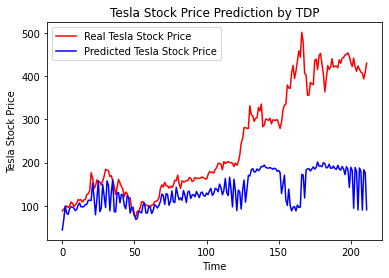

In [73]:
# Visualizing the results
# ---
#
plt.plot(real_stock_price, color='red', label='Real Tesla Stock Price')
plt.plot(predicted_stock_price, color='blue',
         label='Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction by TDP')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [74]:
# Model Evaluation
# ---
#
#YOUR CODE GOES HERE
# Metric used is RMSE
# ---
#
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print(rmse)

147.17692151030099


## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

the RMSE of 147 indicates that the model is not reliable in predicting stock prices. A lower values of RMSE would have indicated a better fit, we will need to train the model further to improve on its accuracy

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

#### a) Did we have the right question?
yes, the question could be solved by modelling


#### b) Did we have the right data?
Yes. However we need more training data


#### c) What can be done to improve the solution?
The following steps can be used to improve our model's performance:

* Getting more training data
* Increasing the timesteps
* Adding some other indicators
* Adding more LSTM layers
* Adding more neurons in the LSTM layers
